In [1]:
!pip install face_recognition


     |████████████████████████████████| 100.1 MB 9.1 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=d0aeccab2e1052780e67ed282370d98e65d2dd82078e1f3f464332bd644165de
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


processing ak_1.png
[]


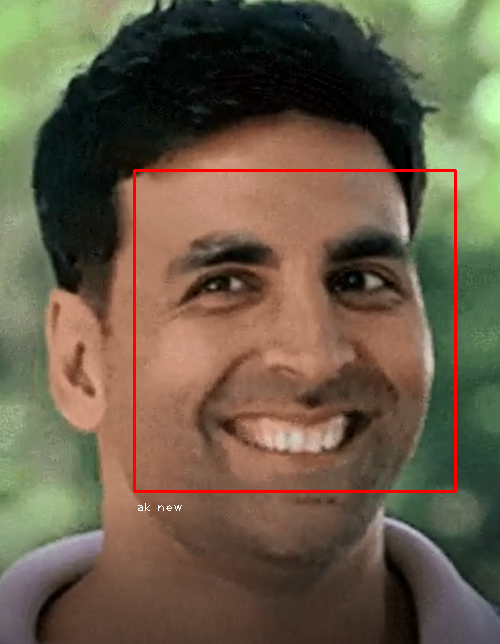

[]


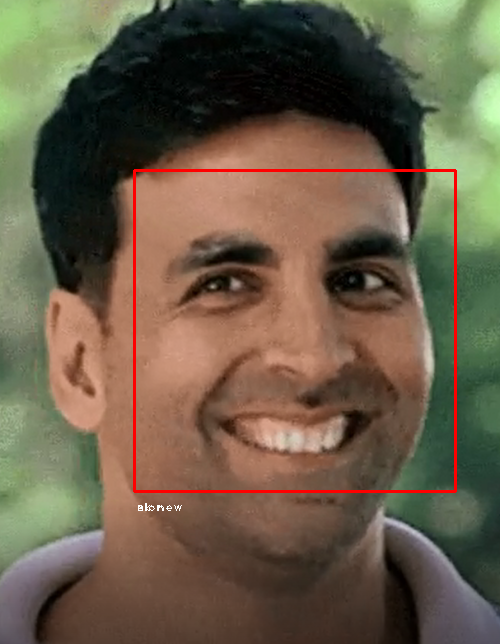

[0.46561627 0.76980369]
processing elon2.jpg
[]


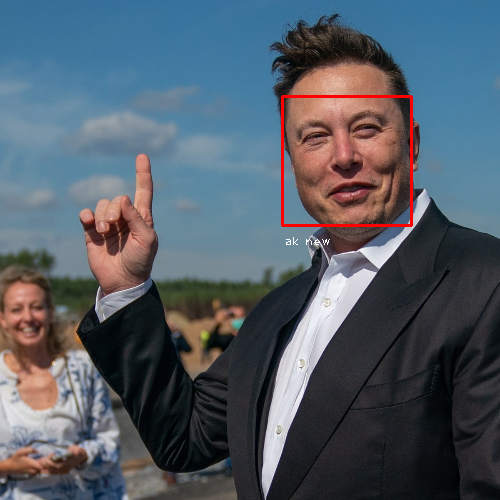

[]


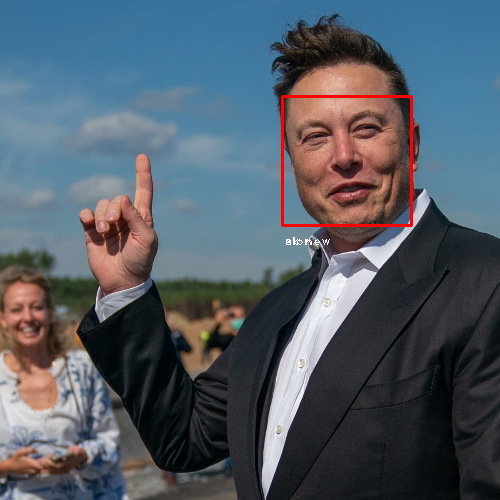

[0.82730152 0.39017688]


In [8]:
#!pip install face_recognition
import cv2
import os

import face_recognition
import numpy as np

from google.colab.patches import cv2_imshow

def read_img(path):
  img=cv2.imread(path)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img,(width,height))

known_encoding = []
known_names=[]
known_dir='known'

def markauth(name):
  with open('auth.csv','r+') as f:
    myDataList = f.readlines()
    print(myDataList)
    nameList=[]
    for line in myDataList:
      entry=line.split(',')
      nameList.append(entry[0])


for file in os.listdir(known_dir):
  img=read_img(known_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  known_encoding.append(img_enc)
  known_names.append(file.split('.')[0])

unknown_dir='unknown'
for file in os.listdir(unknown_dir):
  print("processing",file)
  img=read_img(unknown_dir+'/'+file)
  img_enc=face_recognition.face_encodings(img)[0]
  #results=face_recognition.compare_faces(known_encoding,img_enc)
  results=face_recognition.face_distance(known_encoding,img_enc)

  for i in range(len(results)):
    if results[i]:
      name=known_names[i]
      (top,right,bottom,left) = face_recognition.face_locations(img)[0]
      cv2.rectangle(img,(left,top),(right,bottom),(0,0,255),2)
      cv2.putText(img,name,(left+2,bottom+20),cv2.FONT_HERSHEY_PLAIN,0.8,(255,255,255),1)
      markauth(name)
      cv2_imshow(img)
  print(results)